# Logistic Regression with Hyperparameter Tuning and Cross-Validation for Emotion Classification

In this Colab notebook, we train a **Logistic Regression model** on the augmented dataset for emotion classification. To optimize the model, we employ **hyperparameter tuning** using **GridSearchCV** with 5-fold cross-validation. This ensures that the model achieves the best balance between bias and variance, enhancing its generalization performance.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is divided into training (60%), validation (20%), and testing (20%) subsets.
   - The training set is used for model optimization, the validation set for interim evaluation, and the test set for final evaluation.

2. **Hyperparameter Tuning:**
   - GridSearchCV is used to explore a range of hyperparameters, including:
     - **Regularization strength (C):** Controls the complexity of the model.
     - **Solver:** Optimization algorithm for model fitting.
     - **Penalty:** Regularization type (L2 for Logistic Regression).

3. **Performance Evaluation:**
   - The tuned model is evaluated on the training, validation, and testing datasets using:
     - Accuracy
     - Classification Reports
     - Confusion Matrices

4. **Cross-Validation Insights:**
   - GridSearchCV provides the best combination of hyperparameters and their corresponding cross-validation accuracy.

This notebook demonstrates an end-to-end pipeline for tuning and evaluating Logistic Regression on a balanced text dataset.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=  11.8s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.2s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.4s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   4.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   5.3s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   3.6s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   3.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   3.3s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   4.2s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   3.7s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   4.5s
[CV] END ................C=0.1, penalty=l2, solv

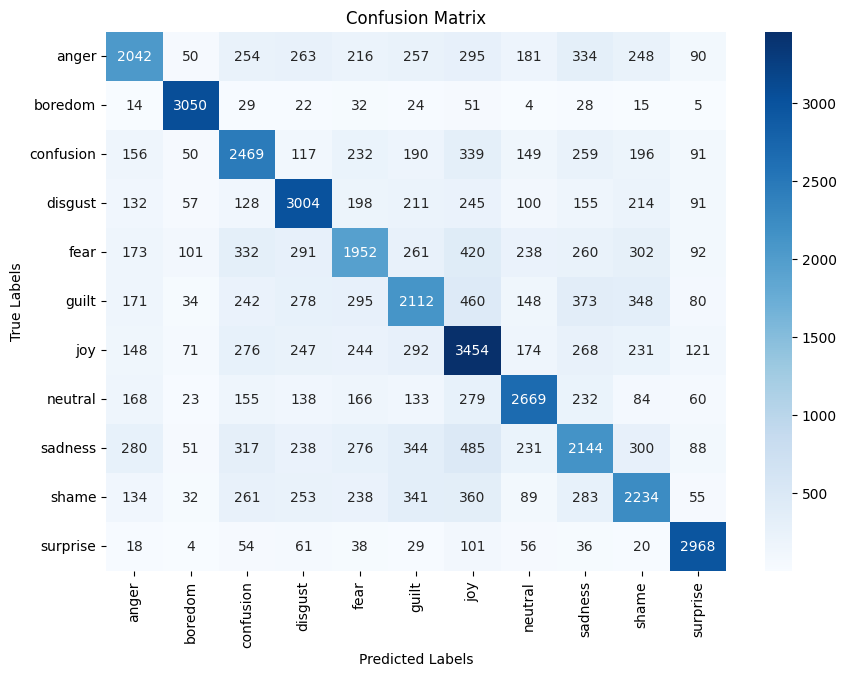

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Load the augmented dataset
# Purpose: Load the dataset containing cleaned text and emotion labels.
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Step 2: Split the dataset into features (X) and labels (y)
# X: Cleaned text data
# y: Emotion labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split into train, validation, and test sets (60%-20%-20%)
# Purpose: Divide the data into training, validation, and test subsets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Vectorize the text data using TF-IDF
# Purpose: Transform text into numerical feature vectors for model input.
tfidf = TfidfVectorizer(max_features=5000)  # Maximum number of features set to 5000
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform training data
X_val_tfidf = tfidf.transform(X_val)         # Transform validation data
X_test_tfidf = tfidf.transform(X_test)       # Transform testing data

# Step 5: Define Logistic Regression model and hyperparameter grid
# Purpose: Specify the model and the range of hyperparameters for tuning.
log_reg_model = LogisticRegression(max_iter=1000)  # Logistic Regression with a maximum of 1000 iterations

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization solvers
    'penalty': ['l2']  # L2 regularization
}

# Step 6: Perform hyperparameter tuning using GridSearchCV
# Purpose: Find the best hyperparameters using 5-fold cross-validation.
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Step 7: Display the best parameters and cross-validation score
# Purpose: Show the optimal hyperparameters and the best cross-validation accuracy.
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 8: Evaluate the best model on the training set
# Purpose: Check the model's performance on the training data.
best_model = grid_search.best_estimator_  # Retrieve the best model
y_train_pred = best_model.predict(X_train_tfidf)  # Predict on training data
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
print("\nTraining Accuracy with Best Parameters:", train_accuracy)
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))

# Step 9: Evaluate the best model on the validation set
# Purpose: Assess the model's generalization ability using the validation set.
y_val_pred = best_model.predict(X_val_tfidf)  # Predict on validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
print("\nValidation Accuracy with Best Parameters:", val_accuracy)
print("Classification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Step 10: Evaluate the best model on the test set
# Purpose: Measure the final performance on unseen test data.
y_test_pred = best_model.predict(X_test_tfidf)  # Predict on test data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate test accuracy
print("\nTest Accuracy with Best Parameters:", test_accuracy)
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 11: Confusion matrix visualization
# Purpose: Visualize model predictions for the test set.

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix to analyze prediction results.
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Unique class labels
    - title: Title for the confusion matrix plot
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)  # Generate confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot heatmap
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Call the function to plot the confusion matrix for the test set
plot_confusion_matrix(y_test, y_test_pred, labels=np.unique(y))
